# Tree Classifier
Welcome to the tree classifier notebook!

In [423]:
#These are the needed modules

import sys
#change these paths to where they are located on your computer
sys.path.append("/Users/anirudhnatarajan/Documents/UPenn/McNeuron")
sys.path.append("/Users/anirudhnatarajan/Documents/UPenn/Actual Trees")
import McNeuron
import pickle
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import Atree
import math
%matplotlib inline

## Getting the data
Get the data and reformat it for easier use.

In [2]:
# IF THIS IS YOUR FIRST TIME RUNNING TREE CLASSIFIER, UNCOMMENT THESE 2 LINES. ELSE, LEAVE THEM COMMENTED



# tree_data = Atree.data_util.pandas_non_missing()
# pickle.dump(tree_data, open('.././trees/tree_data.csv', 'wb'))

In [3]:
tree_data = pickle.load(open('.././trees/tree_data.csv', 'rb'))

In [4]:
trees = tree_data.sort_values(['location'])
trees = trees.reset_index(drop=True)

## Convert the data into a usable format
Organize the data into the format needed to preform classification

In [377]:
def splitTrees(location) :
    """
    splitTrees is used to quickly and efficiently split the data into usable chunks

    Parameters:
    -----------
    location: string
        the name of the location where the tree is from, matches exactly with the trees dataset, and is a string

    Return:
    -------
    splitTrees returns 2 lists of equal size that contain proper training and testing data

    """
    
    ind = np.where(trees['location']==location)[0]
    
    train = [0] * size
    test = [0] * size
    rand = np.linspace(0,totalTrees-1,totalTrees)
    
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(trees['swc'][ind[int(rand[r])]])
        rand = np.delete(rand,r)
        neuron.l_measure_features()
        train[i] = neuron.getNeuronVector()
    
#     print('half')
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(trees['swc'][ind[int(rand[r])]])
        rand = np.delete(rand,r)
        neuron.l_measure_features()
        test[i] = neuron.getNeuronVector()
        
#     print('done')
    return train,test

In [294]:
totalTrees = 20
size = int(totalTrees/2)

trainG, testG = splitTrees('Gabon')
print('done')
trainH, testH = splitTrees('Ghana')
print('done')
trainU, testU = splitTrees('UK')
print('done')
trainW, testW = splitTrees('Wytham Meteoc (UK)')
print('done')

## Classification
Use the data to train a classifier, and then test its accuracy

In [7]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model

In [378]:
def subsetData(arr,q):
    """
    subsetData is used to split the data into lists with only 1 classifying feature in order to test how important each feature is individually for classification

    Parameters:
    -----------
    arr: array or list
        the master array that contains all the features
    q: int
        the index of the desired feature

    Return:
    -------
    subsetData returns an array with only 1 classifying feature

    """
    
    x = [0] * size
    for i in range(0,size) :
        x[i] = arr[i][q]
    return x

In [368]:
"""
This for loop iterates through all of the feaures and prints the accuracy
"""
for q in range(0,22) :
    a = subsetData(trainG,q)
    b = subsetData(trainH,q)
    c = subsetData(trainU,q)
    d = subsetData(trainW,q)
    e = subsetData(testG,q)
    f = subsetData(testH,q)
    g = subsetData(testU,q)
    h = subsetData(testW,q)
    train = np.expand_dims(np.concatenate((a,b,c,d)),axis=1)
    test = np.expand_dims(np.concatenate((e,f,g,h)),axis=1)

    y = np.concatenate(([0] * size,[1] * size,[2] * size,[3] * size))
    clf = BaggingClassifier()
    clf.fit(train,y)
    z = clf.predict(test)
    sum = 0
    parts = 4
    for i in range (0,parts) :
        for j in range (0,size) :
            if z[j + size*i] == i :
                sum += 1
    accuracy = sum / len(z)
    print(accuracy,q)

0.35 0
0.6 1
0.65 2
0.25 3
0.25 4
0.25 5
0.475 6
0.25 7
0.25 8
0.175 9
0.3 10
0.475 11
0.475 12
0.575 13
0.575 14
0.425 15
0.55 16
0.7 17
0.45 18
0.35 19
0.5 20
0.525 21


In [384]:
def getFeatureImportance(length, featureNum) :
    """
    getFeatureImportance uses the subsetData function to generate a matrix with a large number of individual feature accuracies.

    Parameters:
    -----------
    length: int
        how many times the function will get new data and test the accuracy of individual features 
    featureNum: int
        the number of features needed to be tested

    Return:
    -------
    getFeatureImportance returns a matrix of shape (featureNum,length) with all values filled with the accuracy of each feature

    """
    
    masterFeature = np.zeros([featureNum, length])
    for l in range (0,length) :
        trainG, testG = splitTrees('Gabon')
        trainH, testH = splitTrees('Ghana')
        trainU, testU = splitTrees('UK')
        trainW, testW = splitTrees('Wytham Meteoc (UK)')

        for q in range(0,featureNum) :
            a = subsetData(trainG,q)
            b = subsetData(trainH,q)
            c = subsetData(trainU,q)
            d = subsetData(trainW,q)
            e = subsetData(testG,q)
            f = subsetData(testH,q)
            g = subsetData(testU,q)
            h = subsetData(testW,q)
            train = np.expand_dims(np.concatenate((a,b,c,d)),axis=1)
            test = np.expand_dims(np.concatenate((e,f,g,h)),axis=1)

            y = np.concatenate(([0] * size,[1] * size,[2] * size,[3] * size))
            clf = BaggingClassifier()
            clf.fit(train,y)
            z = clf.predict(test)
            sum = 0
            parts = 4
            for i in range (0,parts) :
                for j in range (0,size) :
                    if z[j + size*i] == i :
                        sum += 1
            accuracy = sum / len(z)
            masterFeature[q, l] = accuracy
        if l%10==0 :
            print(l)
    return masterFeature

0
10
20
30
40
50
60
70
80
90


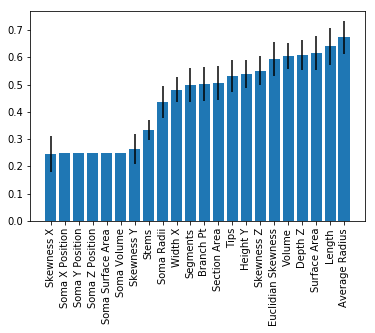

In [385]:
"""
This cell uses the getFeatureImportance funtion to get a large amount of data and graph the
results on a bar graph
"""
featureNames = ['Width X', 'Height Y', 'Depth Z', 'Soma X Position', \
                'Soma Y Position', 'Soma Z Position', 'Soma Radii', \
                'Soma Surface Area', 'Soma Volume', 'Skewness X', \
                'Skewness Y', 'Skewness Z', 'Euclidian Skewness', \
                'Length', 'Surface Area', 'Section Area', 'Volume', \
                'Average Radius', 'Tips', 'Stems', 'Branch Pt', 'Segments']           
featureNum = len(featureNames)

masterFeature = getFeatureImportance(100, featureNum)
values = np.zeros([2,featureNum])
for i in range(0,featureNum) :
    values[0,i] = masterFeature[i,:].mean()
    values[1,i] = masterFeature[i,:].std()
featureNames = np.vstack(featureNames)
index = np.argsort(values[0,:])
featureRange = np.linspace(0,featureNum-1,featureNum)
plt.bar(featureRange,values[0,index], yerr = values[1,index])
plt.xticks(featureRange,featureNames[index,0], rotation='vertical')
plt.subplots_adjust(bottom=0.15)

plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Misc/feature_importance.eps')

In [381]:
"""
Convert the lists into numpy arrays and concatenate them to create 1 big test and train array
"""

trainG = np.vstack(trainG)
trainH = np.vstack(trainH)
trainU = np.vstack(trainU)
trainW = np.vstack(trainW)
testG = np.vstack(testG)
testH = np.vstack(testH)
testU = np.vstack(testU)
testW = np.vstack(testW)


train = np.concatenate((trainG,trainH,trainU,trainW))
test = np.concatenate((testG,testH,testU,testW))
y = np.concatenate(([0] * size,[1] * size,[2] * size,[3] * size))

In [11]:
"""
Try out any of the following classifiers by uncommenting a line!
"""

#clf = svm.SVC()
#clf = RandomForestClassifier()
#clf = ExtraTreesClassifier()
#clf = DecisionTreeClassifier()
#clf = GradientBoostingClassifier()
#clf = BaggingClassifier()
clf = BaggingClassifier(DecisionTreeClassifier())
#clf = neighbors.KNeighborsClassifier()
#clf = SGDClassifier()
#clf = MLPClassifier()
#clf = GaussianNB()
#clf = linear_model.LinearRegression()

In [12]:
"""
Train the classifier and print the accuracy
"""

clf.fit(train,y)
z = clf.predict(test)

sum = 0
parts = 4
for i in range (0,parts) :
    for j in range (0,size) :
        if z[j + size*i] == i :
            sum += 1
        #else :
            #print(j + size*i)
accuracy = sum / len(z)
print(sum, accuracy)

38 0.95


## Data Visualization
Plot the results and the data to get a better understanding of the classification

10
10
10
10


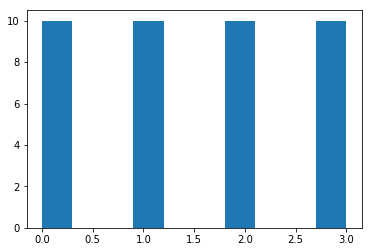

In [13]:
"""
This histogram gives you the breakdown of what the classifier predicted on the test values
"""

plt.hist(z)
print(len(np.where(z == 0)[0]))
print(len(np.where(z == 1)[0]))
print(len(np.where(z == 2)[0]))
print(len(np.where(z == 3)[0]))

### TSNE
Visualize the training data using TSNE

[t-SNE] Computing 39 nearest neighbors...
[t-SNE] Indexed 40 samples in 0.000s...
[t-SNE] Computed neighbors for 40 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 40 / 40
[t-SNE] Mean sigma: 6110.415370
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 49.1895943, gradient norm = 0.4980500 (50 iterations in 0.045s)
[t-SNE] Iteration 100: error = 45.8671799, gradient norm = 0.5969853 (50 iterations in 0.043s)
[t-SNE] Iteration 150: error = 44.4587669, gradient norm = 0.5669622 (50 iterations in 0.030s)
[t-SNE] Iteration 200: error = 46.7047462, gradient norm = 0.3440155 (50 iterations in 0.036s)
[t-SNE] Iteration 250: error = 45.9136086, gradient norm = 0.3927237 (50 iterations in 0.032s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.913609
[t-SNE] Iteration 300: error = 0.8154200, gradient norm = 0.0013082 (50 iterations in 0.030s)
[t-SNE] Iteration 350: error = 0.6596997, gradient norm = 0.0005448 (5

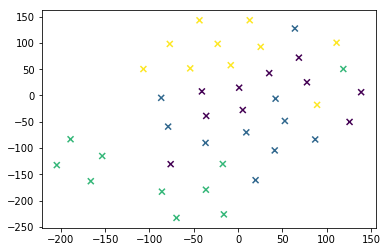

In [382]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, verbose=2).fit_transform(train)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, marker='x')
plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Misc/treeClassificationTSNE.eps')

### PCA
Visualize the training data using PCA

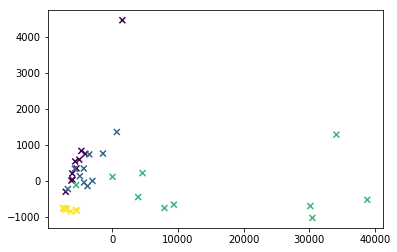

In [383]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train,y)
X_embedded = pca.fit_transform(train,y)

plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, marker='x')
plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Misc/treeClassificationPCA.eps')

In [422]:
treeee = McNeuron.Neuron(trees['swc'][63])
treeee.basic_features()
len(np.where(treeee.features['branch order']>=2)[0])

846